In [183]:
import csv
import pandas as pd

In [184]:
# # Deleting rows with NaN and duplicates 
# trip_sorted = trip_sorted.dropna()
# trip_sorted.drop_duplicates(subset ="name"
#                             , inplace = True) #

trip_sorted = pd.read_csv(r'/Users/KaiyueXu/Desktop/test.csv')

# Deletes the thousand separator in order to make the d.object into an integer. 
trip_sorted = trip_sorted.astype(str).apply(lambda x: x.str.replace('.',''))

# Replaces the comma with a dot in order to make the d.object into a float
trip_sorted = trip_sorted.astype(str).apply(lambda x: x.str.replace(',','.'))

In [185]:
# Extracts the number from reviews count and stores it in another column as an integer
trip_sorted['reviews int'] = trip_sorted['review'].str.extract('(\d+)').astype(int)
#trip_sorted['bubbles int'] = trip_sorted['bubble'].str.extract('(\d+)').astype(float)

# Creates a new column with the rating by deleting the sentence "ud af 5 bobler"
trip_sorted['bubbles int'] = trip_sorted['bubble'].replace(to_replace = r' ud af 5 bobler', value = '', regex=True)

# Converts the rating-column into a float in order to sort on this later.
trip_sorted['bubbles int'] = trip_sorted['bubbles int'].astype(str).astype(float)

In [186]:
# Sorts the data on reviews count
trip_rank = trip_sorted.sort_values(by = ['reviews int'], ascending = False).drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).head(5)
trip_rank

,name,bubble,review,reviews int,bubbles int
52,Restaurant Tight,4.5 ud af 5 bobler,2862 anmeldelser,2862,4.5
143,Kodbyens Fiskebar,4 ud af 5 bobler,2417 anmeldelser,2417,4.0
3,The Olive Kitchen & Bar,5 ud af 5 bobler,2135 anmeldelser,2135,5.0
41,Höst,4.5 ud af 5 bobler,2021 anmeldelser,2021,4.5
422,Mother,3.5 ud af 5 bobler,1919 anmeldelser,1919,3.5


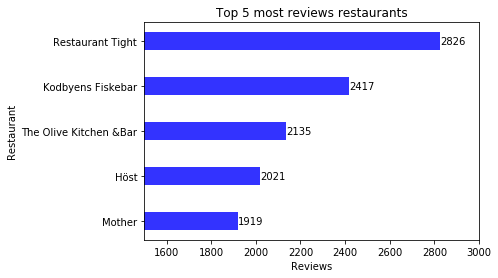

In [198]:
import matplotlib.pyplot as plt

Reviews = [1919,2021,2135,2417,2826]

x = ['Mother','Höst','The Olive Kitchen &Bar','Kodbyens Fiskebar','Restaurant Tight']

plt.barh(range(5), Reviews, 0.4,color='b', alpha = 0.8)

plt.ylabel('Restaurant')

plt.xlabel('Reviews')

plt.title('Top 5 most reviews restaurants')

plt.yticks(range(5),['Mother','Höst','The Olive Kitchen &Bar','Kodbyens Fiskebar','Restaurant Tight'])

plt.xlim([1500,3000])


for x,y in enumerate(Reviews):
    plt.text(y+0.2,x,'%s' %y,va='center')

plt.show()